# Performance Evaluation

In [1]:
import pandas as pd

In [ ]:
df = pd.read_csv("../final_testing_results.csv")
df.head()

,Unnamed: 0,match_name,match_date,format,predicted_score,predicted_std,actual_score,optimal_score,performance_ratio,Player1,...,Top_player7,Top_score7,Top_player8,Top_score8,Top_player9,Top_score9,Top_player10,Top_score10,Top_player11,Top_score11
0,162,MI_New_York-Washington_Freedom-2024-07-06-male...,2024-07-06,T20,521.00,104.80,381,584,0.652397,N Pooran,...,GJ Maxwell,41.0,R Clinton,37.0,M Jansen,35.0,LH Ferguson,31.0,TA Boult,28.0
1,169,Bhutan-Singapore-2024-07-06-female-T20,2024-07-06,T20,232.40,105.87,293,469,0.624733,N Choden,...,A Gurung,35.0,GK Diviya,35.0,JS Pooranakaran,35.0,Y Choden,34.0,Chado Om,31.0
2,156,Zimbabwe-India-2024-07-06-male-T20,2024-07-06,T20,627.30,105.36,484,770,0.628571,BJ Bennett,...,LM Jongwe,44.0,Shubman Gill,44.0,B Muzarabani,41.0,WP Masakadza,39.0,C Madande,37.0
3,147,England-New_Zealand-2024-07-06-female-T20,2024-07-06,T20,578.86,132.15,550,711,0.773558,DN Wyatt,...,SW Bates,60.0,CE Dean,54.0,JM Kerr,54.0,LCN Smith,31.0,AC Kerr,31.0
4,148,Leicestershire-Derbyshire-2024-07-06-male-T20,2024-07-06,T20,517.58,102.56,553,722,0.765928,RK Patel,...,J Hull,54.0,TAR Scriven,37.0,AHT Donald,33.0,SB Wood,31.0,SG Budinger,23.0


C:\Users\Sanidhya\AppData\Local\Temp\ipykernel_23360\381317585.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x='performance_ratio', hue='format', ax=ax, shade=True, palette=custom_palette, linewidth=2)
C:\Users\Sanidhya\AppData\Local\Temp\ipykernel_23360\381317585.py:28: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['performance_ratio'], ax=ax, shade=True, color='gray', label='Overall Performance Ratio', linewidth=2)


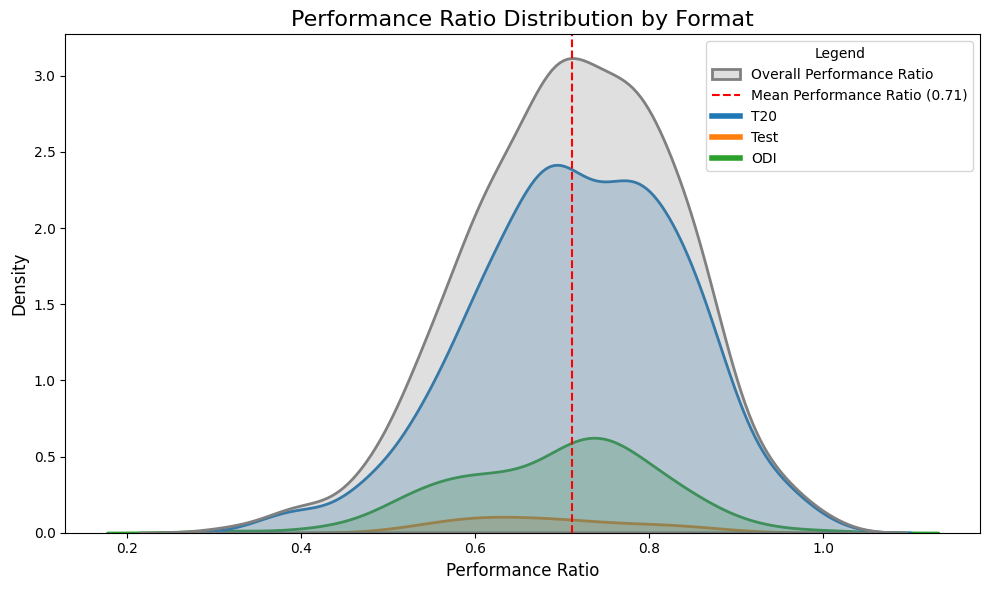

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.lines import Line2D

# Example dataframe (replace with your own dataframe)
# df = pd.read_csv('your_data.csv')
# Assuming df has columns 'format' and 'performance_ratio'

# Calculate the overall mean performance ratio
mean_performance_ratio = df['performance_ratio'].mean()

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Define a custom color palette for formats
custom_palette = {
    'Test': '#ff7f0e',  # Orange
    'ODI': '#2ca02c',  # Green
    'T20': '#1f77b4',  # Blue
}

# Plot the overall performance ratio distribution (using a seaborn kdeplot)

# Plot the performance ratio distribution by format with custom colors
sns.kdeplot(data=df, x='performance_ratio', hue='format', ax=ax, shade=True, palette=custom_palette, linewidth=2)

sns.kdeplot(df['performance_ratio'], ax=ax, shade=True, color='gray', label='Overall Performance Ratio', linewidth=2)

# Highlight the mean overall performance ratio
ax.axvline(mean_performance_ratio, color='red', linestyle='--', label=f'Mean Performance Ratio ({mean_performance_ratio:.2f})')

# Create custom legends for the format colors
handles, labels = ax.get_legend_handles_labels()
format_legend_handles = [Line2D([0], [0], color='#1f77b4', lw=4),
                         Line2D([0], [0], color='#ff7f0e', lw=4),
                         Line2D([0], [0], color='#2ca02c', lw=4)]
format_legend_labels = ['T20', 'Test', 'ODI']

# Combine the legends
ax.legend(handles=handles + format_legend_handles, labels=labels + format_legend_labels, title='Legend', loc='upper right')

# Add labels and title
ax.set_title('Performance Ratio Distribution by Format', fontsize=16)
ax.set_xlabel('Performance Ratio', fontsize=12)
ax.set_ylabel('Density', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


## Overall Performance

In [30]:
df["performance_ratio"].mean()

0.7111745348167597

### Formats

In [35]:
df[df["format"] == "T20"]["performance_ratio"].mean()

0.7166099212610079

In [36]:
df[df["format"] == "ODI"]["performance_ratio"].mean()

0.6918774681974093

In [40]:
df[df["format"] == "Test"]["performance_ratio"].mean()

0.6812368122418295

### International Teams

In [48]:
intl_teams = ["Afghanistan", "Australia", "Bangladesh", "England", "India", 
              "Ireland", "New Zealand", "Pakistan", "South Africa", "Sri Lanka", 
              "West Indies", "Zimbabwe"]

df[df["match_name"].apply(lambda x: any(team in x for team in intl_teams))]["performance_ratio"].mean()

0.7210100801777185

In [49]:
df[df["format"] == "T20"][df["match_name"].apply(lambda x: any(team in x for team in intl_teams))]["performance_ratio"].mean()

C:\Users\Sanidhya\AppData\Local\Temp\ipykernel_15580\3970469359.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["format"] == "T20"][df["match_name"].apply(lambda x: any(team in x for team in intl_teams))]["performance_ratio"].mean()


0.7284958236011431

In [53]:
df[df["match_name"].apply(lambda x: "male" in x)]["performance_ratio"].mean()

0.7111745348167597

In [55]:
df[df["match_name"].apply(lambda x: "female" in x)]["performance_ratio"].mean()

0.7438860429413973

## IPL Performance

In [ ]:
ipl_teams = ["Chennai_Super_Kings", "Delhi_Daredevils", "Delhi_Capitals", "Kings_XI_Punjab", 
             "Kolkata_Knight_Riders", "Mumbai_Indians", "Rajasthan_Royals", "Royal_Challengers_Bangalore", 
             "Sunrisers_Hyderabad", "Pune_Warriors", "Rising_Pune_Supergiant", "Gujarat_Lions", "Deccan_Chargers",
             "Kochi_Tuskers_Kerala", "Punjab_Kings", "Lucknow_Super_Giants"]

df[df["match_name"].apply(lambda x: any(team in x for team in ipl_teams))] # Actaully, no IPL matches in the test set

,Unnamed: 0,match_name,match_date,predicted_score,predicted_std,actual_score,optimal_score,performance_ratio,Player1,Predicted_score1,...,Top_player7,Top_score7,Top_player8,Top_score8,Top_player9,Top_score9,Top_player10,Top_score10,Top_player11,Top_score11
